# Predicting the Age of Abalone

#### Group Name: Group 63

#### Name(s) & ID(s) of Group Members: Puneet Kaur Grewal (s3900991)

#### 

## Table of Contents
* [Introduction](#intro) 
  + [Dataset Source](#source)
  + [Dataset Details](#details)
  + [Dataset Variables](#variables)
  + [Response Variable](#response)
* [Goals and Objectives](#goals)
* [Data Cleaning and Preprocessing](#cleaning_preprocessing)
  + [Dataset Retrieval](#retrieval)
  + [Dataset Cleaning](#cleaning)
* [Data Exploration and Visualisation](#explore_visualise)
  + [Univariate Visualisation](#univariate)
  + [Two-Variable Visualisation](#two_variable)
  + [Three-Variable Visualisation](#three_variable)
* [Summary and Conclusion](#summary)
* [References](#references)

## Introduction <a id='intro'></a>

###  Dataset Source <a id='reportoverview'></a>

The Abalone dataset used in the study has been sourced from UCI. This dataset was originally used in a non-machine learning study titled, "The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait". This study was authored by Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn and Wes B Ford (1994). This dataset contains the physical measurements and the number of rings on an abalone.

### Dataset Details <a id='details'></a>

The dataset is about abalone and their physical measurements, as well as the number of rings they have. This dataset contains information about the gender of abalone as well as their length, diameter, height, whole weight, shucked weight, viscera weight, and shell weight. The number of rings, which are used to predict age, is also present in this dataset. The features provided in this dataset seem to be sufficient for predictive modeling to find the number of rings as a regression problem.

This dataset has a total of 8 features and 4177 observations. Rows containing missing data have been removed as well as a scaling of the ranges of continuous values using an ANN (by dividing by 200).


### Dataset Variables <a id='variables'></a>

The variables in the abalone dataset are described in the table below. These descriptions are taken from the UCI data source.

|Name | Data Type | Units | Description|
|---|---|---|---|
|Gender | Nominal | NA| M, F, and I (infant)|
|Length | Continuous | mm | Longest shell measurement|
|Diameter | Continuous | mm | Perpendicular to length|
|Height | Continuous | mm | With meat in shell|
|Whole weight | Continuous | grams | Whole abalone|
|Shucked weight | Continuous | grams | Weight of meat|
|Viscera weight | Continuous | grams | Gut weight (after bleeding)|
|Shell weight | Continuous | grams | After being dried|
|Rings | Discrete | NA | +1.5 gives the age in years|

### Response Variable <a id='response'></a>

For this project, the response variable in this dataset will be number of rings. This means that during Phase 2 of the report, the number of rings (which are an indication of the age of an abalone), will be predicted based on the descriptive variables. 

## Goals and Objectives<a id='goals'></a>

An abalone is a general term used to describe many marine snails (Britannica, 2020). According to the UCI, the process of finding out the age of an abalone is a time consuming one. This is because it involves cutting into the shell, staining it, and then looking at it though a microscope. For this reason, it would be beneficial if there was a way to easily predict the age of an abalone using it's physical measurements. Marine biologists would save a lot of time and resources when conducting research if they were able to estimate abalone age rather than going through a long process. This would also help those selling abalone, as the price of abalone is dependent on its age, therefore sellers will also save time. Those purchasing abalone will also be able ensure that the age of the abalone they are purchasing is correct and that they are not being scammed. 

Therefore, the main objective of this project is to predict the age of an abalone (based on the number of rings) using its physical measurements. Another goal of this project is to see which physical measurement is the best predictor of abalone age. A secondary goal is to perform some exploratory data analysis. This will be done using basic descriptive statistics and data visualisation plots in order to see patterns and relationships already present in the data, particularly between abalone of the same gender. This will be done after some data cleaning and preprocessing, which is part of this Phase 1 report. 

At this point in the report we will assume that the rows in out dataset are not correlated, meaning that the number of ring observations are independent of one another in this dataset.

## Data Cleaning and Preprocessing<a id='cleaning_preprocessing'></a>

In this section, we describe the data cleaning and preprocessing steps undertaken for this project.

### Data Retrieval<a id='retrieval'></a>

- We read in the dataset from the GitHub repository and loaded necessary modules.
- 5 randomly sampled rows from this dataset were then displayed to ensure that the dataset was correctly read.

In [1]:
# Code sourced from www.featureranking.com 
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

pd.set_option('display.max_columns', None) 

###
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")
###

# for Mac OS users only!
# if you run into any SSL certification issues, 
# you may need to run the following command for a Mac OS installation.
# $/Applications/Python 3.x/Install Certificates.command
# if this does not fix the issue, please run the code chunk below
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
# name of the dataset to be imported from our GitHub account
df_name = 'abolone.csv'

In [3]:
df_url = 'https://raw.githubusercontent.com/vaksakalli/datasets/master/' + df_name
url_content = requests.get(df_url).content
abolone_df = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

In [4]:
abolone_df.sample(5, random_state=999).style.set_precision(3)

,Gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3259,M,0.640,0.505,0.165,1.444,0.615,0.303,0.390,18
3583,F,0.625,0.500,0.175,1.273,0.564,0.302,0.374,9
1932,F,0.620,0.495,0.170,1.062,0.372,0.213,0.340,11
3328,I,0.575,0.475,0.170,0.967,0.378,0.284,0.275,13
2426,I,0.565,0.435,0.155,0.782,0.272,0.168,0.285,14


### Data Cleaning<a id='cleaning'></a>

*   Drop irrelevant features in our dataset
*   Check and rename/ modify some column names
*   Check for missing values
*   Remove all the rows with missing values 
*   Random sampling of the dataset for 5000 rows

All columns name in the dataset have been displayed below.

In [5]:
abolone_df.columns

Index(['Gender', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

From the numerical features it can be seen that there is a feature called `Whole weight`. It is currently unclear if `Whole weight` is just the sum of `Shucked weight`, `Viscera weight`, and `Shell weight`. If this is the case, then perhaps `Whole weight` may be considered a redundant variable. To test this, the total of `Shucked weight`, `Viscera weight`, and `Shell weight` will be compared with `Whole weight`.

In [6]:
weights_df = pd.DataFrame(columns = ['whole_weight', 'total_weight'])
weights_df['whole_weight'] = abolone_df['Whole weight']
weights_df['total_weight'] = abolone_df['Shucked weight'] + abolone_df['Viscera weight'] + abolone_df['Shell weight']

weights_df.head(5).style.set_precision(3)

,whole_weight,total_weight
0,0.514,0.476
1,0.226,0.218
2,0.677,0.608
3,0.516,0.485
4,0.205,0.184


Just from looking at the first five values we can see that the whole weight and total weight are different. This shows that `Whole weight` is not the total of `Shucked weight`, `Viscera weight`, and `Shell weight`. For this reason, we will not drop any of the weight features.

We will also change the column names in order to remove any whitespace and make them all lowercase. 

In [7]:
abolone_df = abolone_df.rename(columns={'Gender': 'gender',
                                        'Length': 'length',
                                        'Diameter': 'diameter',
                                        'Height': 'height',
                                        'Whole weight': 'whole_weight', 
                                        'Shucked weight': 'shucked_weight', 
                                        'Viscera weight': 'viscera_weight',
                                        'Shell weight': 'shell_weight',
                                        'Rings': 'rings'})

Next we check the data types and observe that they match the intended data types. As they all correctly match up, no change is needed here. 

In [8]:
# Code sourced from www.featureranking.com
# Check for data types
print(f"Shape of the dataset = {abolone_df.shape} \n")
print(f"Data types are below where 'object' indicates a string type: ")
print(abolone_df.dtypes)

Shape of the dataset = (4177, 9) 

Data types are below where 'object' indicates a string type: 
gender             object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
dtype: object


The unique values for the `gender` column, which is the only one containing categorical data types, are displayed to check for any white spaces and other data quality issues. It turns out that the data is already clean, and no further data cleaning steps are necessary here.

In [9]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of categorical features</b>'))
abolone_df.describe(include= np.object).T

,count,unique,top,freq
gender,4177,3,M,1528


In [10]:
# This code has be sourced from www.featureranking.com
# To see all unique values for categorical data types
categoricalColumns = abolone_df.columns[abolone_df.dtypes==object].tolist()

for col in categoricalColumns:
    print('Unique values for ' + col)
    print(abolone_df[col].unique())
    print('')

Unique values for gender
['M' 'F' 'I']



The summary statistics are generated for all the numerical features as shown below. There does not seem to be any outliers present.

In [11]:
from IPython.display import display, HTML
display(HTML('<b>Table 2: Summary of numerical features</b>'))
abolone_df.describe(include=['int64','float64']).T.style.set_precision(3)

,count,mean,std,min,25%,50%,75%,max
length,4177.000,0.524,0.120,0.075,0.450,0.545,0.615,0.815
diameter,4177.000,0.408,0.099,0.055,0.350,0.425,0.480,0.650
height,4177.000,0.140,0.042,0.000,0.115,0.140,0.165,1.130
whole_weight,4177.000,0.829,0.490,0.002,0.442,0.799,1.153,2.825
shucked_weight,4177.000,0.359,0.222,0.001,0.186,0.336,0.502,1.488
viscera_weight,4177.000,0.181,0.110,0.001,0.093,0.171,0.253,0.760
shell_weight,4177.000,0.239,0.139,0.002,0.130,0.234,0.329,1.005
rings,4177.000,9.934,3.224,1.000,8.000,9.000,11.000,29.000


There seems to be a minimum height of zero which is not possible. This is most likely an error made when inserting the data. For this reason, rows with a height of '0' will be removed from the dataset.

In [12]:
# Removing rows with a zero
abolone_df = abolone_df[abolone_df['height'] != 0]

# Resets the index
abolone_df.reset_index(drop = True, inplace = True)

# New shape of dataset after the removal of rows
abolone_df.shape

(4175, 9)

Missing values are checked by displaying the number of missing values in every column. There are no missing values present in the data.

In [13]:
# Count missing values in each column
print(f"\nNumber of missing values for each column/ feature:")
print(abolone_df.isnull().sum())


Number of missing values for each column/ feature:
gender            0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64


## Data Exploration and Visualisation<a id='explore_visualise'></a>

Our dataset is now considered to be clean and we are ready to start visualising and explore each of the features.

### Univariate Visualisation<a id='univariate'></a>

#### Bar Chart  of the Gender of Abalone
We count the `gender` to see which gender is most frequent in the abalone dataset. This data is sorted in descending order. As shown in Figure 1, the majority of the abalone in the dataset are males. The number of infants is higher than females, however, the difference between the two is not large. Although the number of males, females and infants is not equal, all the categories have a relatively same number of abalone in each. 

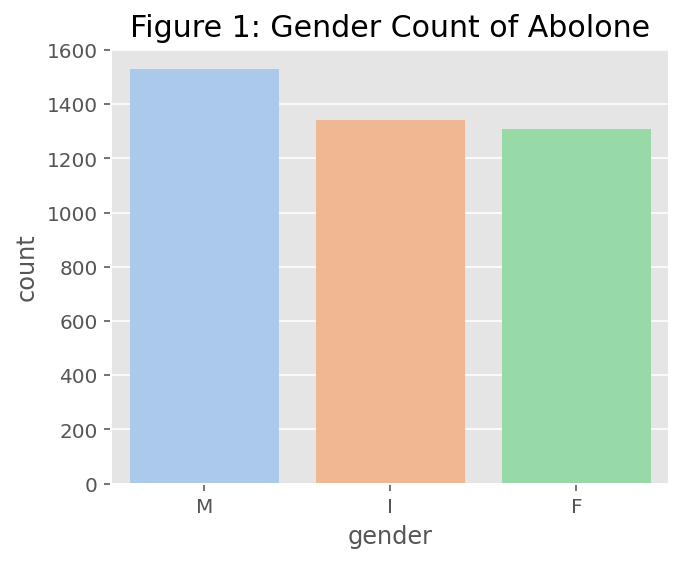

In [14]:
plt.figure(figsize = (5,4))
fig = sns.countplot(x = 'gender', data = abolone_df, palette = 'pastel', 
                    order = abolone_df['gender'].value_counts().index)
fig = plt.title('Figure 1: Gender Count of Abolone', fontsize = 15)
plt.show()

#### Boxplot & Histogram of Rings
From Figures 2A and 2B we can see that the data is right skewed and has a large range. This boxplot shows that most abalone have between 5 to 15 rings. Figure 2A shows potential outliers as indicated by the data points below the lower whisker as well the data points above the upper whisker. This suggests that a log transformation may need to be used in Phase 2. This also suggests that the center of distribution for the number of rings would be best described using the median, rather than the mean. 

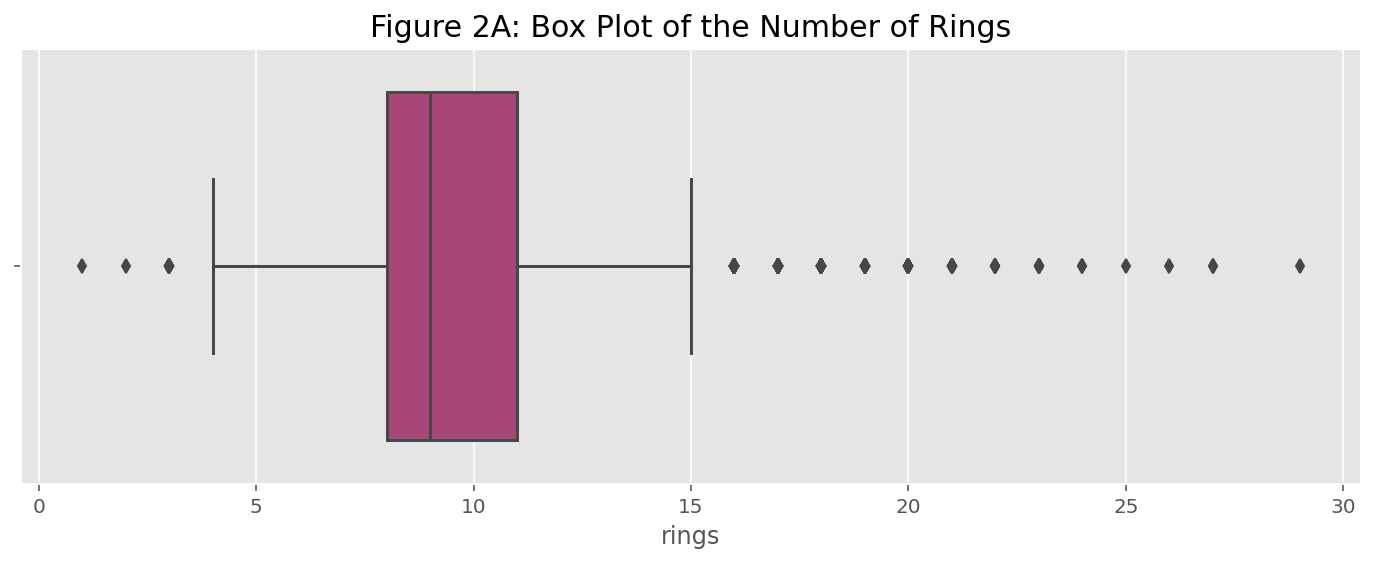

In [15]:
plt.figure(figsize = (12,4))
sns.boxplot(abolone_df['rings'], palette='magma').set_title('Figure 2A: Box Plot of the Number of Rings', fontsize = 15)
plt.show();

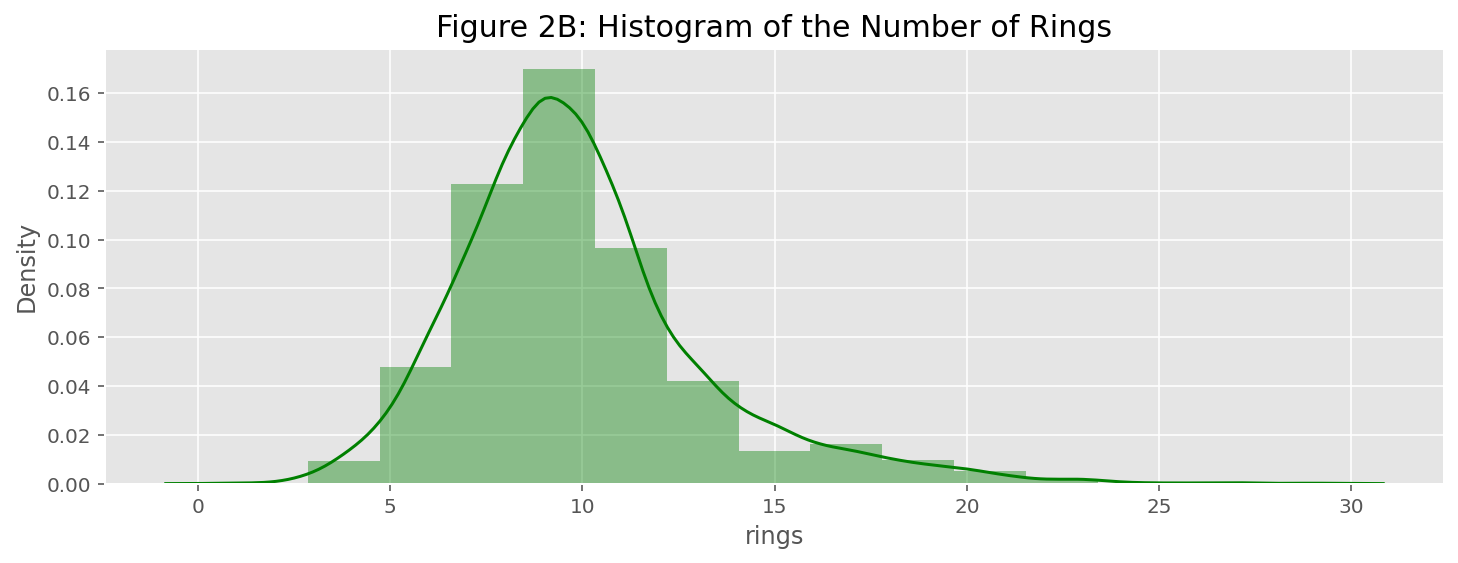

In [16]:
plt.figure(figsize = (12,4))
sns.distplot(abolone_df['rings'], kde=True, bins=15, color = 'green').set_title('Figure 2B: Histogram of the Number of Rings', fontsize = 15)
plt.show();

### Two-Variable Visualisation<a id='two_variable'></a>

#### Scatterplot of Height and Number of Rings
Figure 3 shows that there is a positive correlation between the height of an abalone and the number of rings that it has. The association between height and number of rings starts off strong with a lower height and weight, but progressively becomes weaker as the value of these variables increases. However, there seems to be two outliers with heights greater than 0.5mm which do not follow this pattern. 

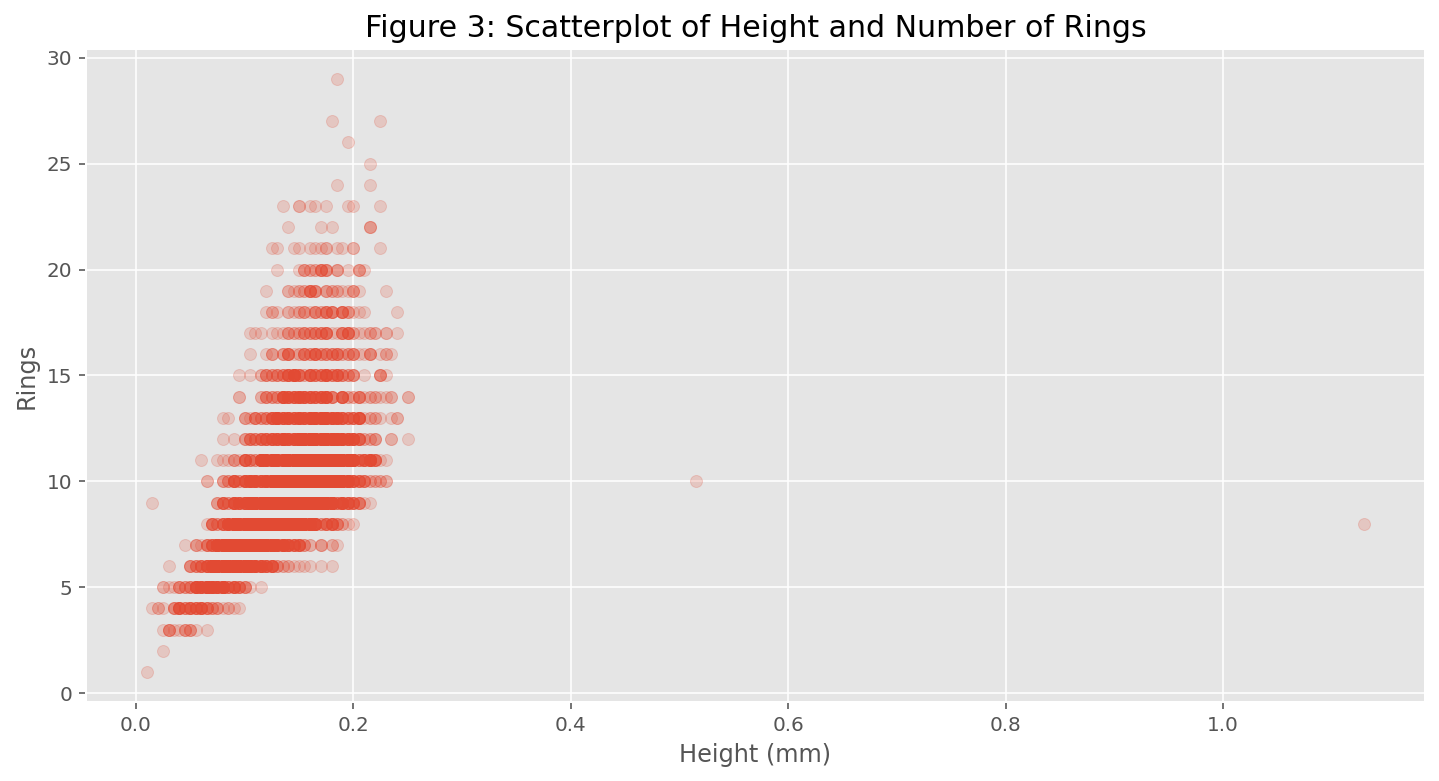

In [17]:
plt.figure(figsize = (12,6))
plt.scatter(abolone_df['height'], abolone_df['rings'], alpha = 0.2)
plt.title('Figure 3: Scatterplot of Height and Number of Rings', fontsize = 15)
plt.xlabel('Height (mm)')
plt.ylabel('Rings')
plt.show();

#### Boxplot of the Number of Rings per Gender
From Figure 4 we can see the males and females seem to have an extremely similar distribution of number of rings, only differing from their outliers. On the other hand, infants have a lower distribution of their number of rings. This is to be expected as they are young, and a lower number of rings means that they are younger in age. Potential outliers seem to be present in all genders of abalone. 

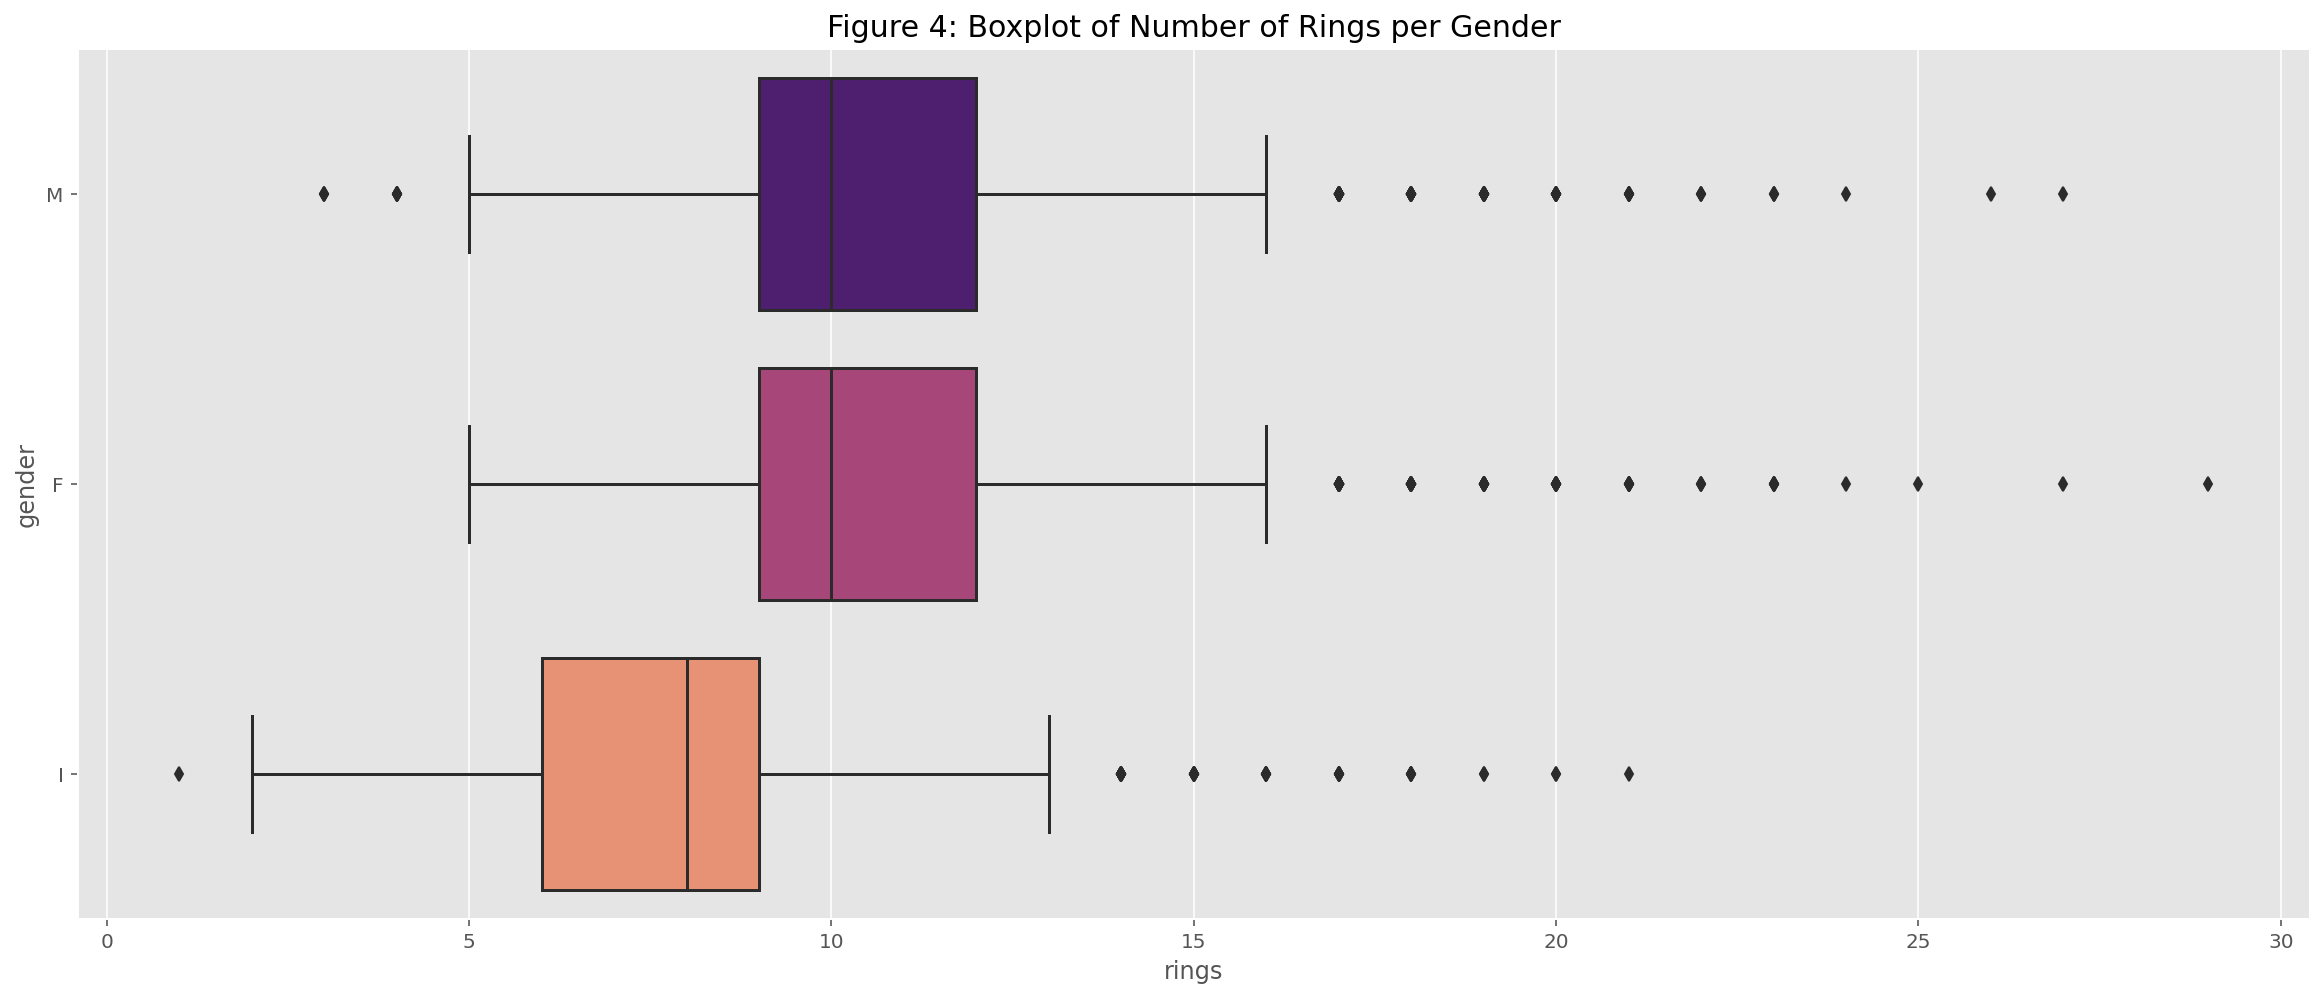

In [18]:
plt.figure(figsize = (20,8))
sns.boxplot(abolone_df['rings'], abolone_df['gender'], palette = 'magma');
plt.title('Figure 4: Boxplot of Number of Rings per Gender', fontsize = 15)
plt.show();

#### Scatterplots for Different Height Measurements

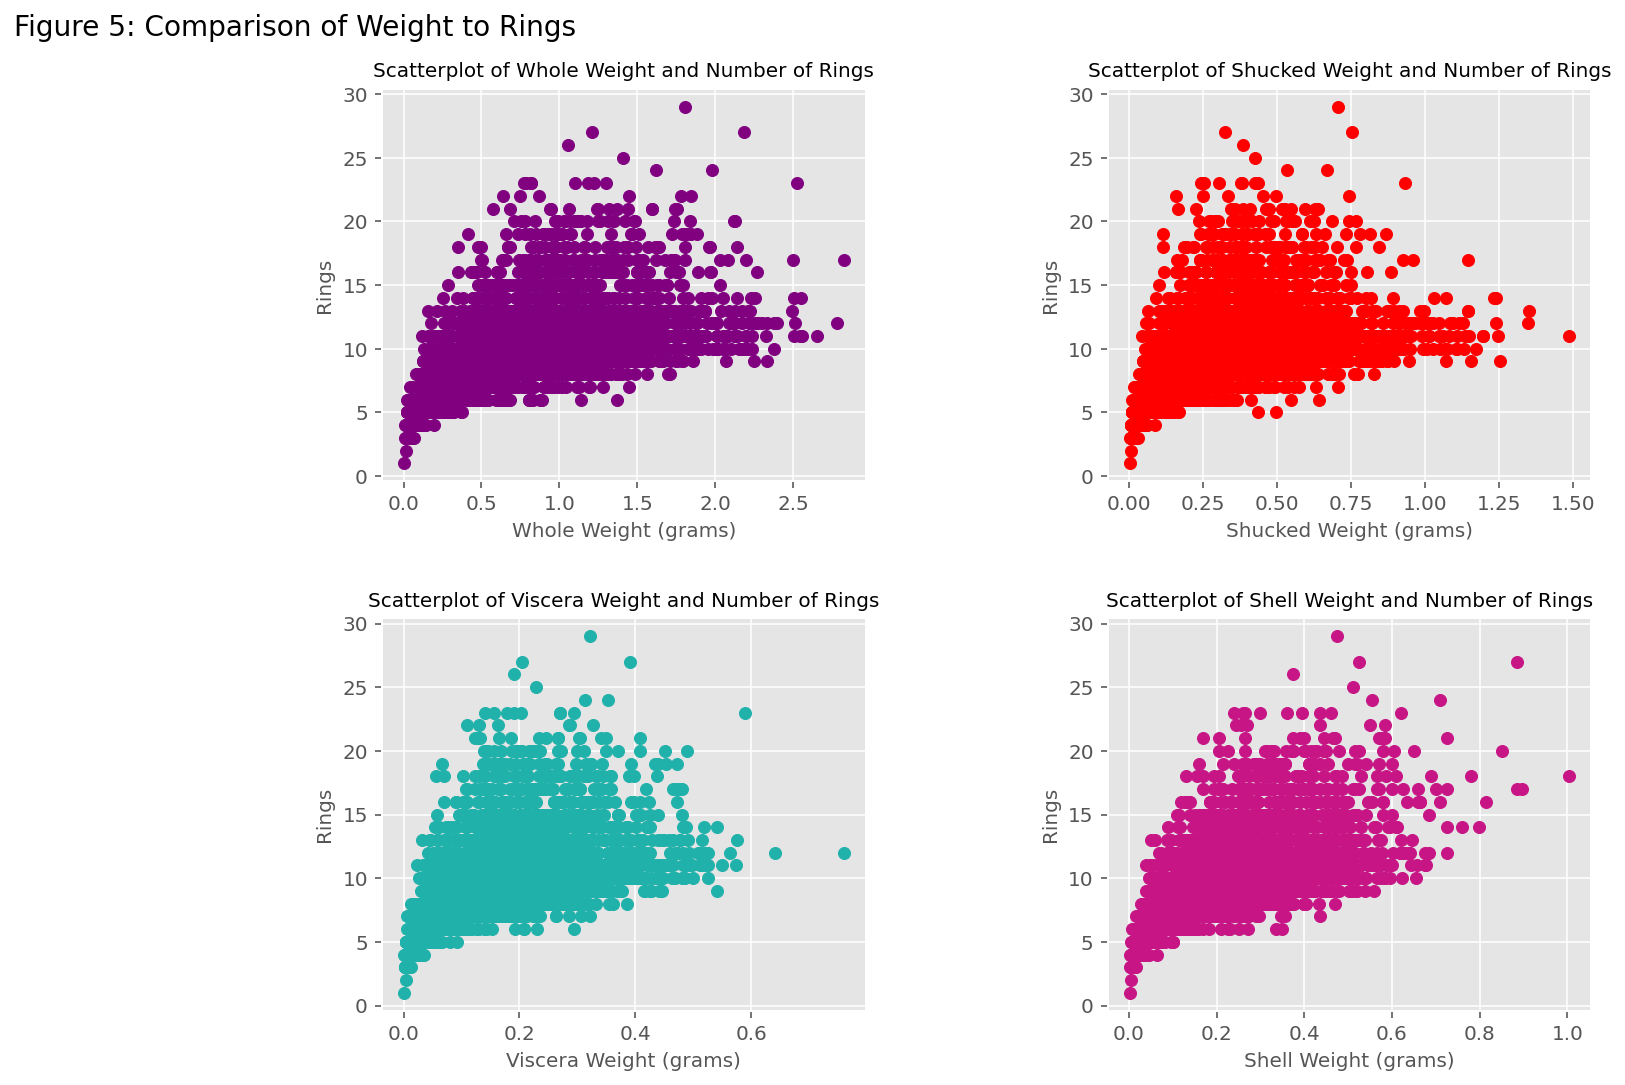

In [19]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].scatter(abolone_df['whole_weight'], abolone_df['rings'], color = 'purple')
ax[0, 0].set_title('Scatterplot of Whole Weight and Number of Rings', fontsize = 10)
ax[0, 0].set_xlabel('Whole Weight (grams)', fontsize = 10)
ax[0, 0].set_ylabel('Rings', fontsize = 10)


ax[0, 1].scatter(abolone_df['shucked_weight'], abolone_df['rings'], color = 'red')
ax[0, 1].set_title('Scatterplot of Shucked Weight and Number of Rings', fontsize = 10)
ax[0, 1].set_xlabel('Shucked Weight (grams)', fontsize = 10)
ax[0, 1].set_ylabel('Rings', fontsize = 10)


ax[1, 0].scatter(abolone_df['viscera_weight'], abolone_df['rings'], color = 'lightseagreen')
ax[1, 0].set_title('Scatterplot of Viscera Weight and Number of Rings', fontsize = 10)
ax[1, 0].set_xlabel('Viscera Weight (grams)', fontsize = 10)
ax[1, 0].set_ylabel('Rings', fontsize = 10)


ax[1, 1].scatter(abolone_df['shell_weight'], abolone_df['rings'], color = 'mediumvioletred')
ax[1, 1].set_title('Scatterplot of Shell Weight and Number of Rings', fontsize = 10)
ax[1, 1].set_xlabel('Shell Weight (grams)', fontsize = 10)
ax[1, 1].set_ylabel('Rings', fontsize = 10)

plt.suptitle('Figure 5: Comparison of Weight to Rings', fontsize = 14)
plt.subplots_adjust(left=0.60,
                    bottom=-0.75, 
                    right=2, 
                    wspace=0.5, 
                    hspace= 0.35,
                    top = 0.85
                   )


plt.show()

From Figures 5, we are able to compare which type of weight measurement has the strongest association with the number of rings, used to predict age. It can be seen that all weight features have a positive, but weak relationship with rings. The scatterplot's for `whole_weight` and `shucked_weight` seem to show data points beginning to plateau with the number of rings only slightly increasing with an increase in weight. For `viscera_weight` and `shell_weight`, there seems to be a slightly stronger increase of number of rings as weight increases. This perhaps suggests that `viscera_weight` and `shell_weight` are likely to be better for predictive modeling. 

### Three-Variable Visualisation<a id='three_variable'></a>

#### Scatterplot of Length and Number of Rings by Gender
From Figure 6 we can see that the length of abalone and the number of rings seems to have a positive relationship. This relationship seems to get weaker as the length of the abalone increases. The distribution seems to be similar for male and female abalone. There also seems to be more males who have a shorter length than females. Infants appear to have the shortest lengths.

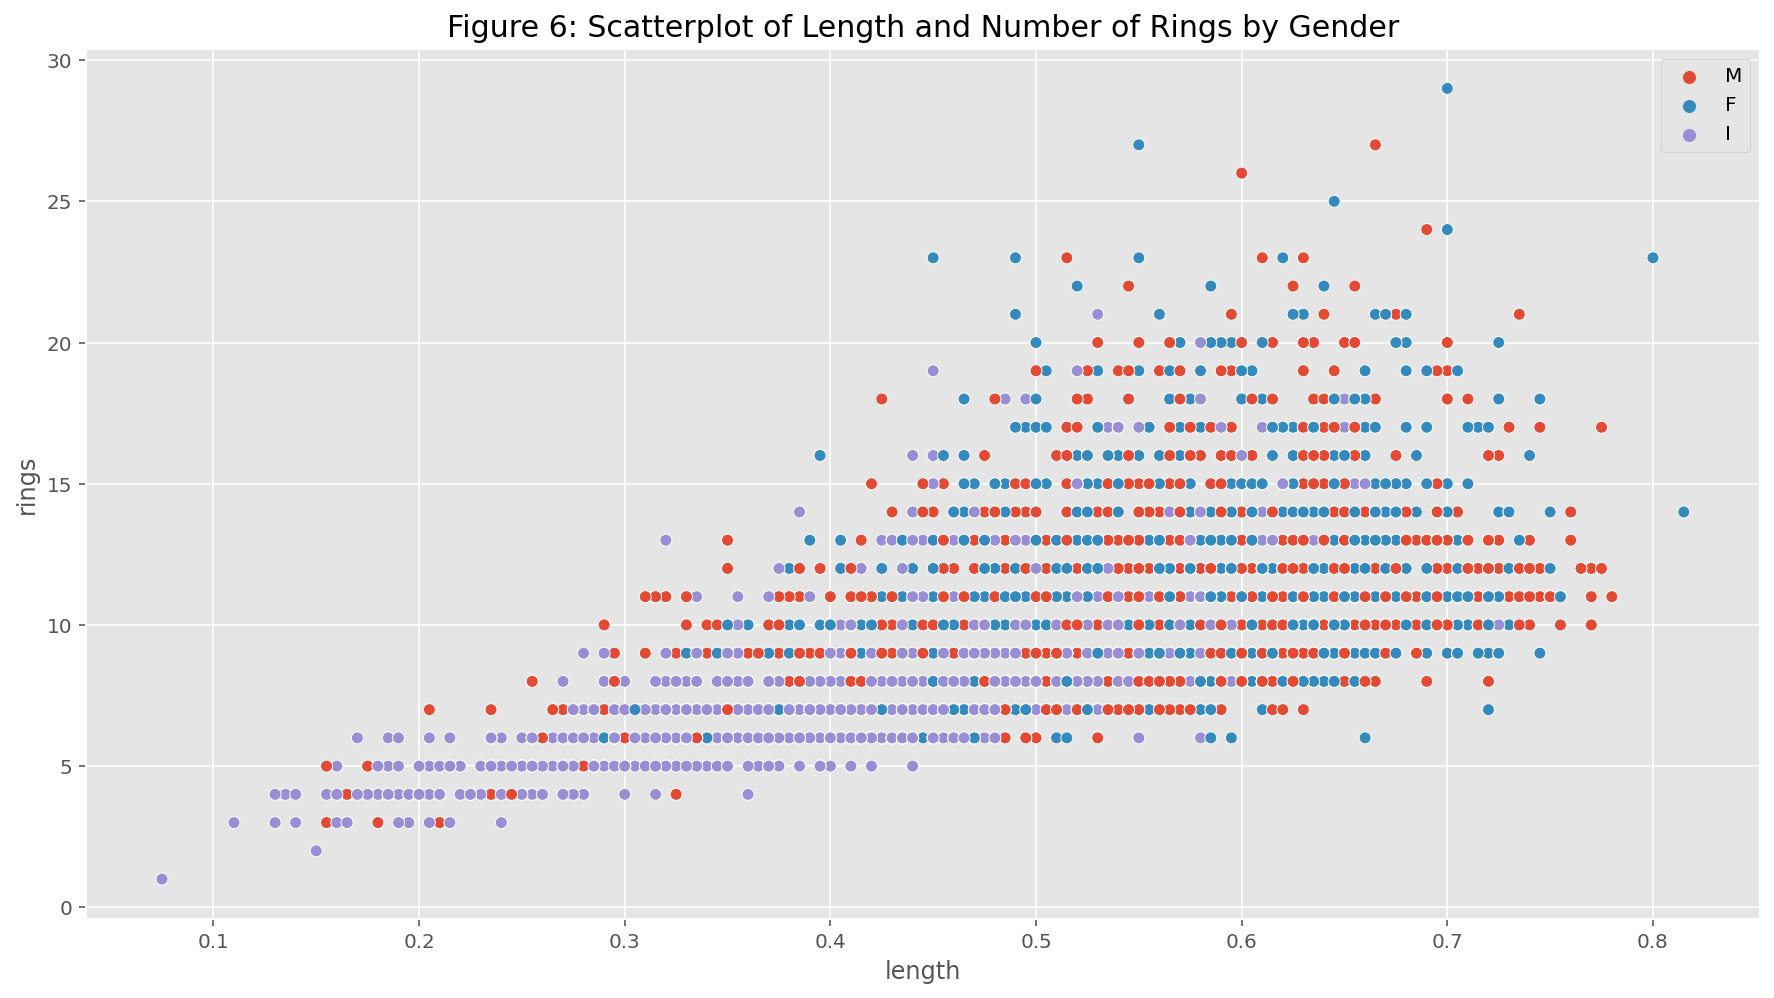

In [20]:
plt.figure(figsize = (15,8))
sns.scatterplot(abolone_df['length'], abolone_df['rings'], hue = abolone_df['gender'])
plt.title('Figure 6: Scatterplot of Length and Number of Rings by Gender', fontsize = 15);
plt.legend(loc = 'upper right')
plt.show();

#### Scatterplot of Diameter and Number of Rings by Gender
From Figure 7, it can be seen that there is a weak, positive relationship between diameter and the number of rings on an abalone. The slight positive relationship can particularly be seen for infant abalone as when the diameter increases, so does the number of rings. However, for male and female abalone, an association does not appear to be clear as data points to not follow a distinct pattern. 

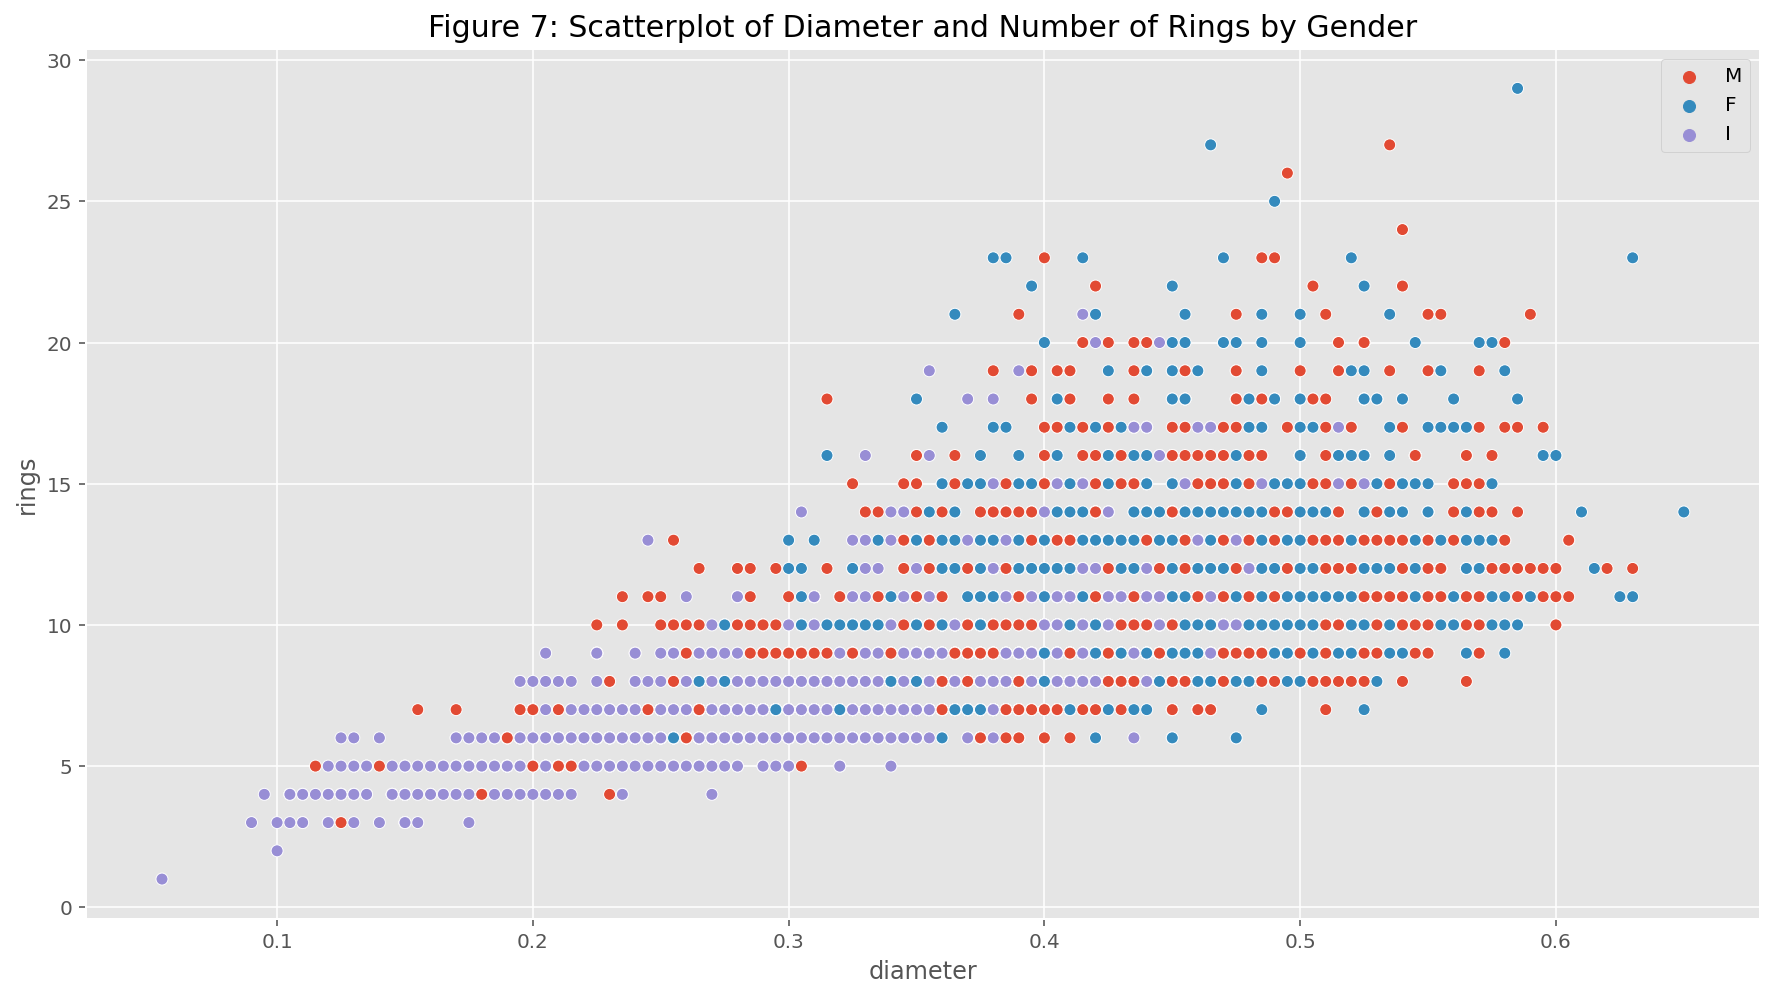

In [21]:
plt.figure(figsize = (15,8))
sns.scatterplot(abolone_df['diameter'], abolone_df['rings'], hue = abolone_df['gender'])
plt.title('Figure 7: Scatterplot of Diameter and Number of Rings by Gender', fontsize = 15);
plt.legend(loc = 'upper right')
plt.show();

## Summary and Conclusions<a id='summary'></a>

The ability to predict the age of an abalone using physical measurements is highly beneficial for marine biologists and those who sell and purchase seafood. For this reason, if a model can be constructed to allow for the quick and reliable predicting of abalone age, it would benefit the seafood industry and researchers. The goal of this project is to see if it is possible to create a reliable model for predicting abalone age (based on their number of rings) using the Abalone dataset. 

In Phase 1, we conducted data cleaning and preprocessing. Firstly, we noticed that there was a variable called `Whole Weight` and we wanted to see if it was just the total of the other weight variables. It was found that this was not the case and therefore kept this variable. We then renamed all columns to remove the whitespace and to make them all lower case. After this, we checked to see if the data had any missing values and outliers. We found that there were no missing values, however, there here was a '0' value for the variable `height` which is likely to be an error while inserting the data as a '0' height is not possible. For this reason, any row with a '0' height was removed. Other than this, there was not much other data cleaning needed, as the data seemed to be relatively clean from the start.

After this, data visualisation was conducted to explore the data. Through the univariate visualisations we were able to see that majority of the abalone in the data set were males with a relatively equal number of females and infants. Although there are more males in the dataset, the frequency of each gender in the dataset is similar to one another. We also found that the response variable, `rings`, is right skewed with potential outliers. This suggests that a log transformation will likely need to be used to address the skew, and deal with the potential outliers. 

The two-variable visualisations show a positive relationship between abalone height and number of rings which progressively gets weaker as height and the number of rings increases. This suggests that height could potentially be an indicator to figure out the age of an abalone, however further analysis may still need to be done. Through the use of a box-plot, the relationship between gender and the number of rings on abalone was also investigated. It was found that male and female abalone had an extremely similar distribution of number of rings. This perhaps highlights that male and female abalone live to a similar age. Further investigation could be done to see if female and male abalone have similar physical measurements. This is useful to know as perhaps male abalone could grow longer at a younger age than females. This could indicate whether or not male and female abalone require different predictive models for age. The comparison of the four weight features also shows that viscera and shell weight are likely to be better for predictive modeling. 

The three-variable visualisations show the relationship of abalone length and the number of rings by gender. This scatter plot shows a positive relationship between length and rings on abalone. There is a weak, positive relationship between abalone `length` and `rings` on an abalone. This suggests that as abalone get older their height also appears to increase. The relationship between length and number of rings for females and males also seems to be similar. This suggests that if a predictive model is constructed for the physical measurement of `length`, the same one could be used for both genders. This is unlike for infants that have a much lower distribution, which is expected as these abalone are younger. The scatterplot for the relationship of diameter and the number of rings by gender seems to show a weak association with the data points scattered evenly across the graph. The relationship seems to be stronger for infants compared to males and females. 

Although through the data visualisation section of this Phase 1 report we have seen potential associations between the explanatory and response variables, more analysis still needs to be conducted to identify and any further relationships. 

## References<a id='references'></a>

* Dua, D. and Graff, C. (2019). UCI Machine Learning Repository: Abalone Data Set (UCI MLR). Retrieved September 24, 2021 from https://archive.ics.uci.edu/ml/datasets/abalone

* Britannica, T. Editors of Encycopaedia (2020, April 23). Abalone (Encyclopaedia Brittanica). Retrieved September 24, 2021 from https://www.britannica.com/animal/abalone

* Aksakalli, V., Yenice, Z., Wong, Y.K. (2019, August 6). Feature Selection and Ranking in Machine Learning. Retrieved September 24, 2021 from https://www.featureranking.com/


In [23]:
abolone_df.to_csv("abolone_df.csv", index = False)